In [1]:
##In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website.
##We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ad_data = pd.read_csv('advertising.csv')

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


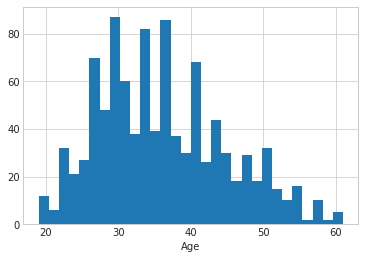

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

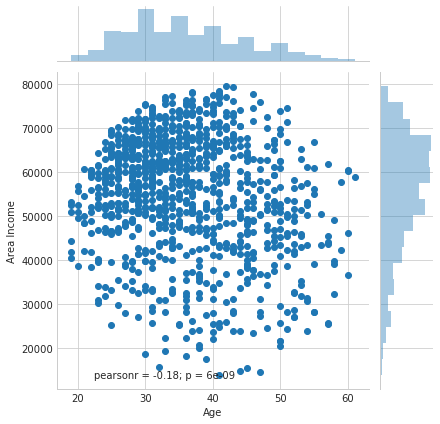

In [7]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

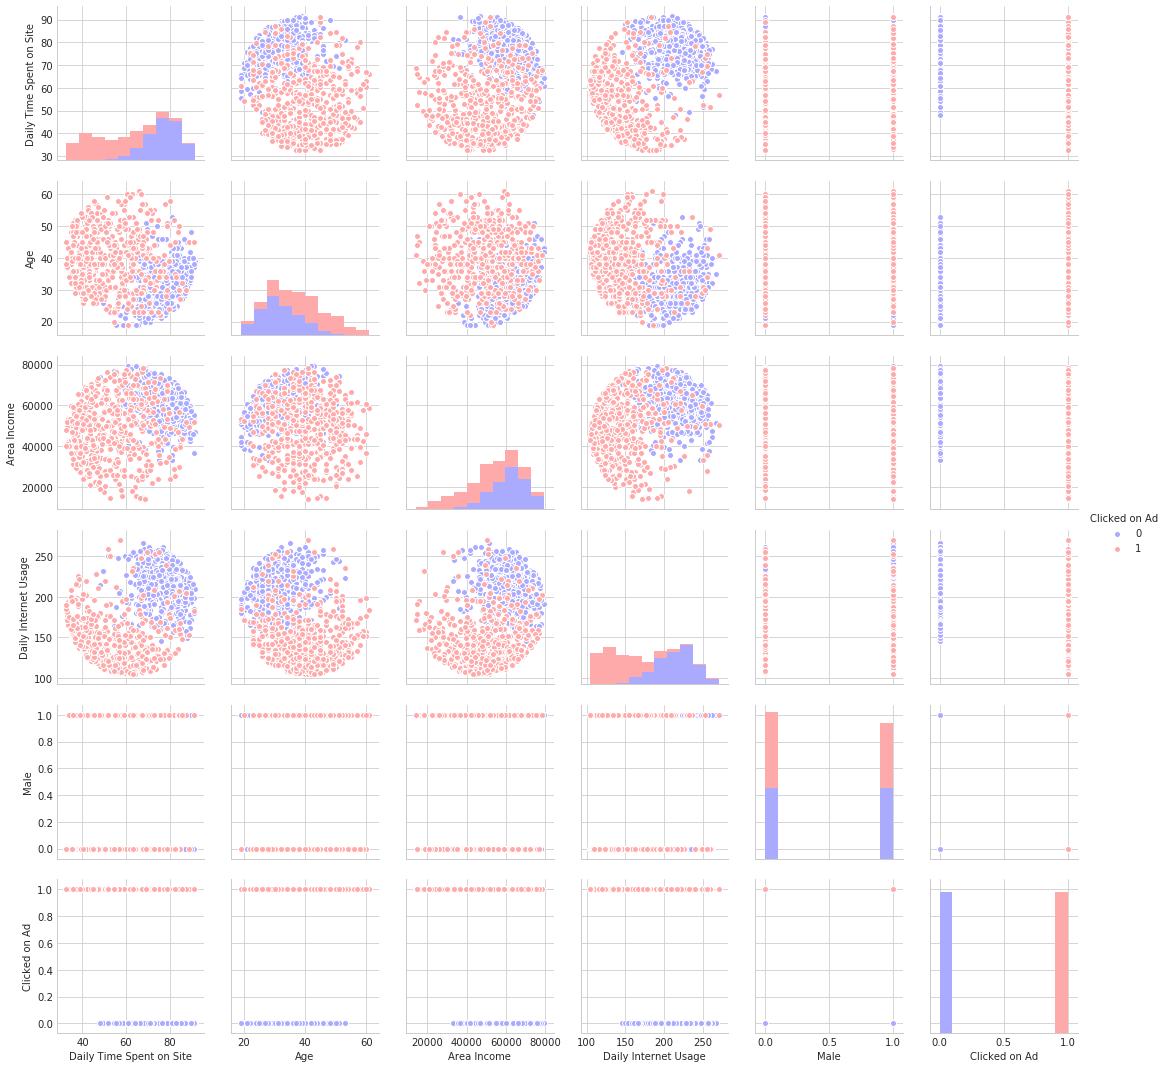

In [8]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

In [9]:
##Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
type(y)

pandas.core.series.Series

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
type(X_train)

pandas.core.frame.DataFrame

In [16]:
type(y_train)

pandas.core.series.Series

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
##Predictions and Evaluations

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

